In [5]:
#from __future__ import print_function
import sys
sys.path.append('/Users/rohaanadvani/Library/Python/2.7/site-packages'),
import vamp
import librosa
import matplotlib.pyplot as plt

%matplotlib inline
from IPython.display import Audio


In [14]:
audio, sr = librosa.load('InMyFeelings.wav', sr=44100, mono=True)
Audio(audio[0:2*44100], rate=sr)

In [19]:
data = vamp.collect(audio, sr, "mtg-melodia:melodia")
# data is a dictionary containing one item called "vector"
# vector is a tuple of two values: the hop size used for analysis and the array of pitch values
# Note that the hop size is *always* equal to 128/44100.0 = 2.9 ms
hop, melody = data['vector']
print(hop)
# print(melody)

 0.002902494


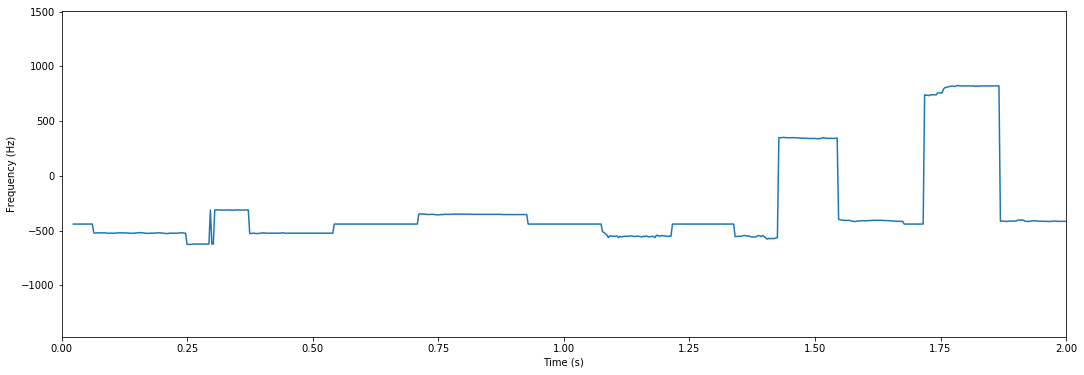

In [13]:
import numpy as np
timestamps = 8 * 128/44100.0 + np.arange(len(melody)) * (128/44100.0)
# Melodia returns unvoiced (=no melody) sections as negative values. So by default, we get:
plt.figure(figsize=(18,6))
plt.plot(timestamps, melody)
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.xlim(0, 2)
plt.show()

In [15]:
def Aud2Str(file, threshold=1):
    audio, sr = librosa.load(file)
    data = vamp.collect(audio[0:2*44100], sr, "mtg-melodia:melodia")
    hop, melody = data['vector']
    string_out = []
    prev = melody[0]
    for i in range(1,len(melody)):
        curr = melody[i]
        diff = curr - prev
        s = 's'
        if curr < 0:
            # if curr < 0 means non-melody section, encoded as 'x'
            s = 'x'
        elif abs(diff) > threshold:
            s = 'u' if diff>0 else 'd'
            prev = curr
        string_out.append(s)
    return string_out

In [16]:
out = Aud2Str('InMyFeelings.wav', 1)
print(out)

['x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x', 'x',